In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/DATASET NUMERIK INTERGALACTIC - Sheet1.csv")

print("5 baris pertama dataset:")
print(df.head())

print("\nInfo dataset:")
print(df.info())

print("\nStatistik deskriptif dataset:")
print(df.describe())

print("\nMissing values per kolom:")
print(df.isna().sum())


5 baris pertama dataset:
         PROVINSI  TAHUN    IKP Luas Panen Tanaman Padi (ha) (Ha)  \
0            ACEH   2020  70,92                          317869,4   
1  SUMATERA UTARA   2020  71,84                          388591,2   
2  SUMATERA BARAT   2020  78,64                          295664,5   
3            RIAU   2020  64,12                          64733,13   
4           JAMBI   2020     70                          84772,93   

  Produktivitas Tanaman Padi (ku/ha) (Ku/ha) Rekap Produksi Padi (ton) (Ton)  \
0                                      55,28                         1757313   
1                                      52,51                         2040500   
2                                      46,92                         1387269   
3                                      37,64                          243685   
4                                      45,58                        386413,5   

  Persentase Penduduk Miskin - Maret Gini Ratio  
0                            

In [6]:
df.columns.tolist()

['PROVINSI',
 'TAHUN',
 'IKP',
 'Luas Panen Tanaman Padi (ha) (Ha)',
 'Produktivitas Tanaman Padi (ku/ha) (Ku/ha)',
 'Rekap Produksi Padi (ton) (Ton)',
 'Persentase Penduduk Miskin - Maret',
 'Gini Ratio']

In [7]:
import pandas as pd
import numpy as np

# df = df.copy()

num_cols = ['IKP',
            'Luas Panen Tanaman Padi (ha) (Ha)',
            'Produktivitas Tanaman Padi (ku/ha) (Ku/ha)',
            'Rekap Produksi Padi (ton) (Ton)',
            'Persentase Penduduk Miskin - Maret',
            'Gini Ratio']

for col in num_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

df['TAHUN'] = df['TAHUN'].astype(int)
df['PROVINSI'] = df['PROVINSI'].astype(str)

df = df.drop_duplicates()
df = df.fillna(method='ffill').fillna(method='bfill')

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PROVINSI                                    170 non-null    object 
 1   TAHUN                                       170 non-null    int64  
 2   IKP                                         170 non-null    float64
 3   Luas Panen Tanaman Padi (ha) (Ha)           170 non-null    float64
 4   Produktivitas Tanaman Padi (ku/ha) (Ku/ha)  170 non-null    float64
 5   Rekap Produksi Padi (ton) (Ton)             170 non-null    float64
 6   Persentase Penduduk Miskin - Maret          170 non-null    float64
 7   Gini Ratio                                  170 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.8+ KB
None
         PROVINSI  TAHUN    IKP  Luas Panen Tanaman Padi (ha) (Ha)  \
0            ACEH   2020  70

/tmp/ipython-input-2493807435.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


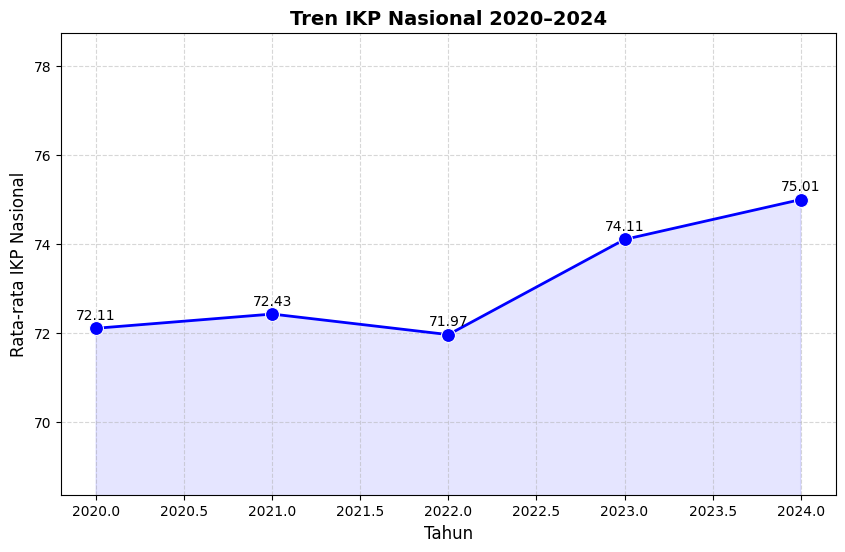

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

national_trend = df.groupby('TAHUN')['IKP'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=national_trend, x='TAHUN', y='IKP', marker='o', markersize=10, linewidth=2, color='blue')
for i, row in national_trend.iterrows():
    plt.text(row['TAHUN'], row['IKP']+0.2, f"{row['IKP']:.2f}", horizontalalignment='center', fontsize=10)
plt.fill_between(national_trend['TAHUN'], national_trend['IKP'], alpha=0.1, color='blue')
plt.title("Tren IKP Nasional 2020–2024", fontsize=14, fontweight='bold')
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Rata-rata IKP Nasional", fontsize=12)
plt.ylim(national_trend['IKP'].min()*0.95, national_trend['IKP'].max()*1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


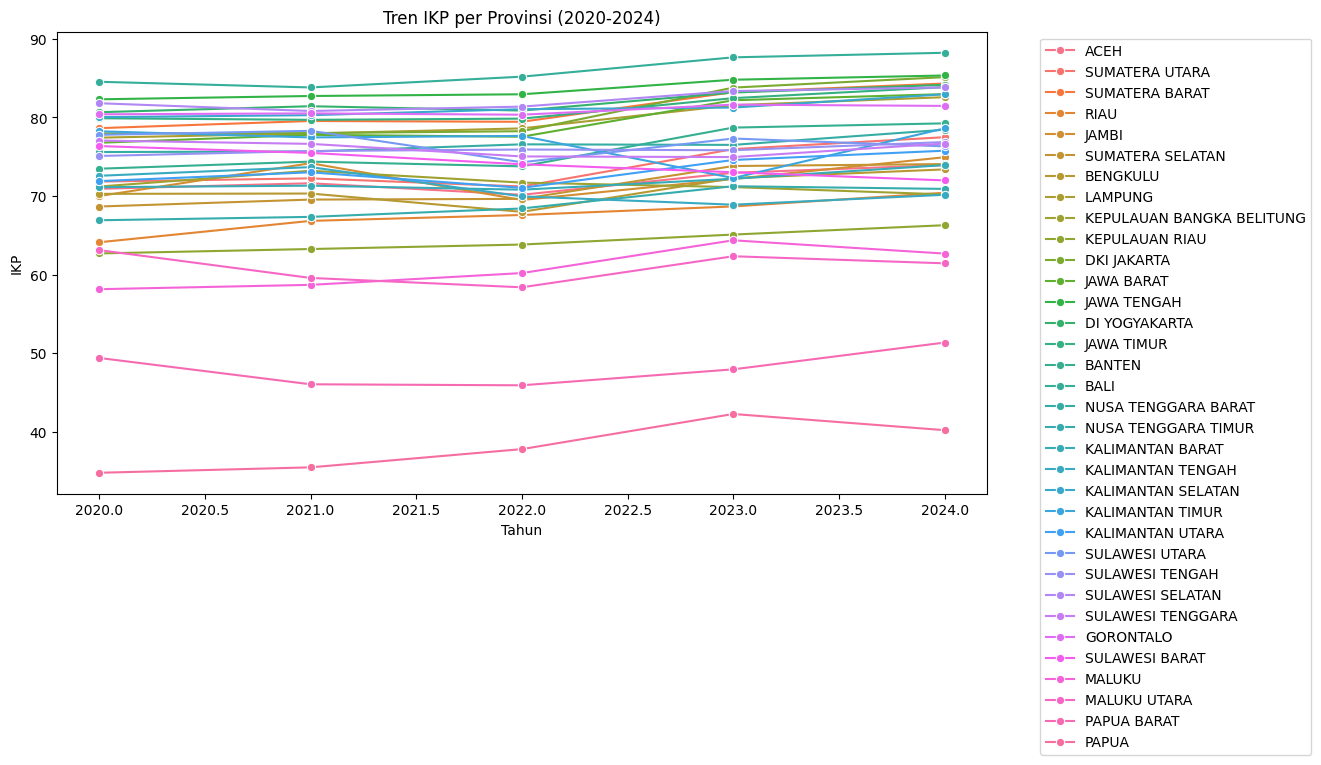

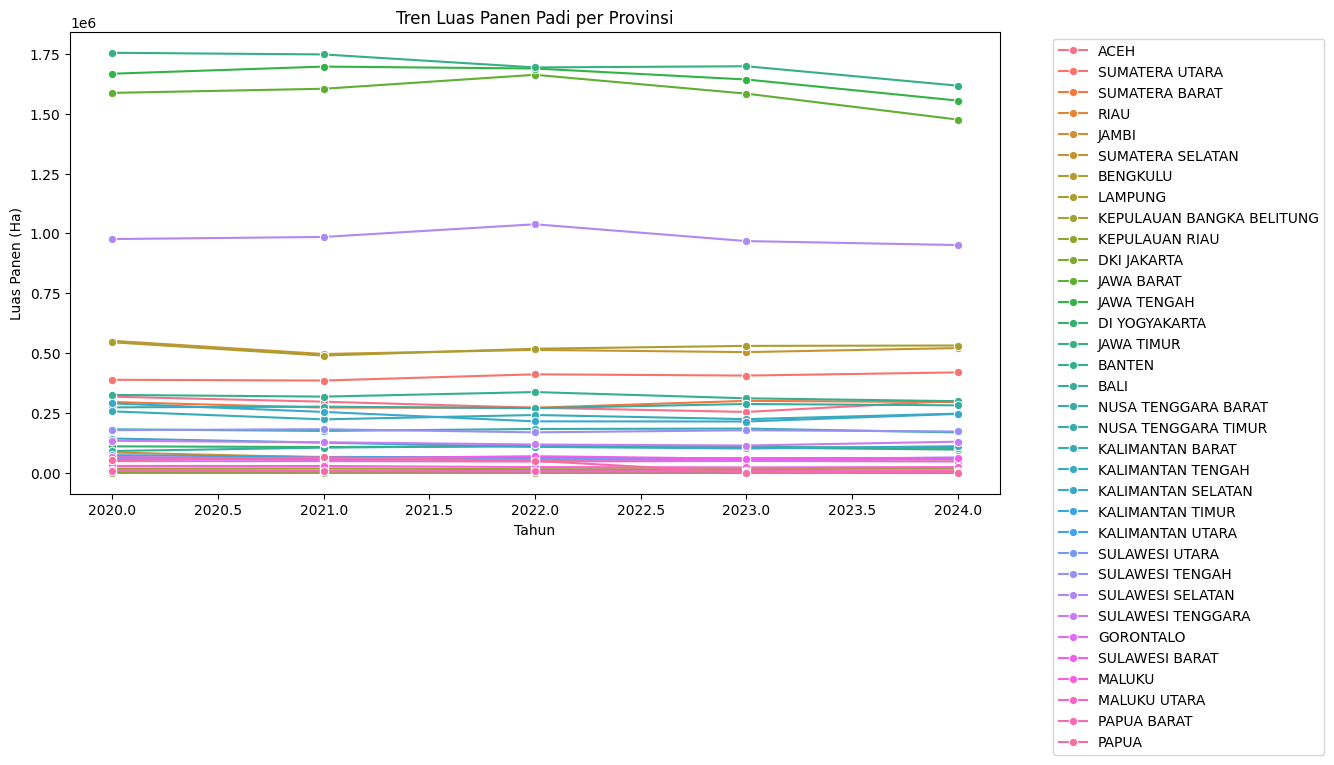

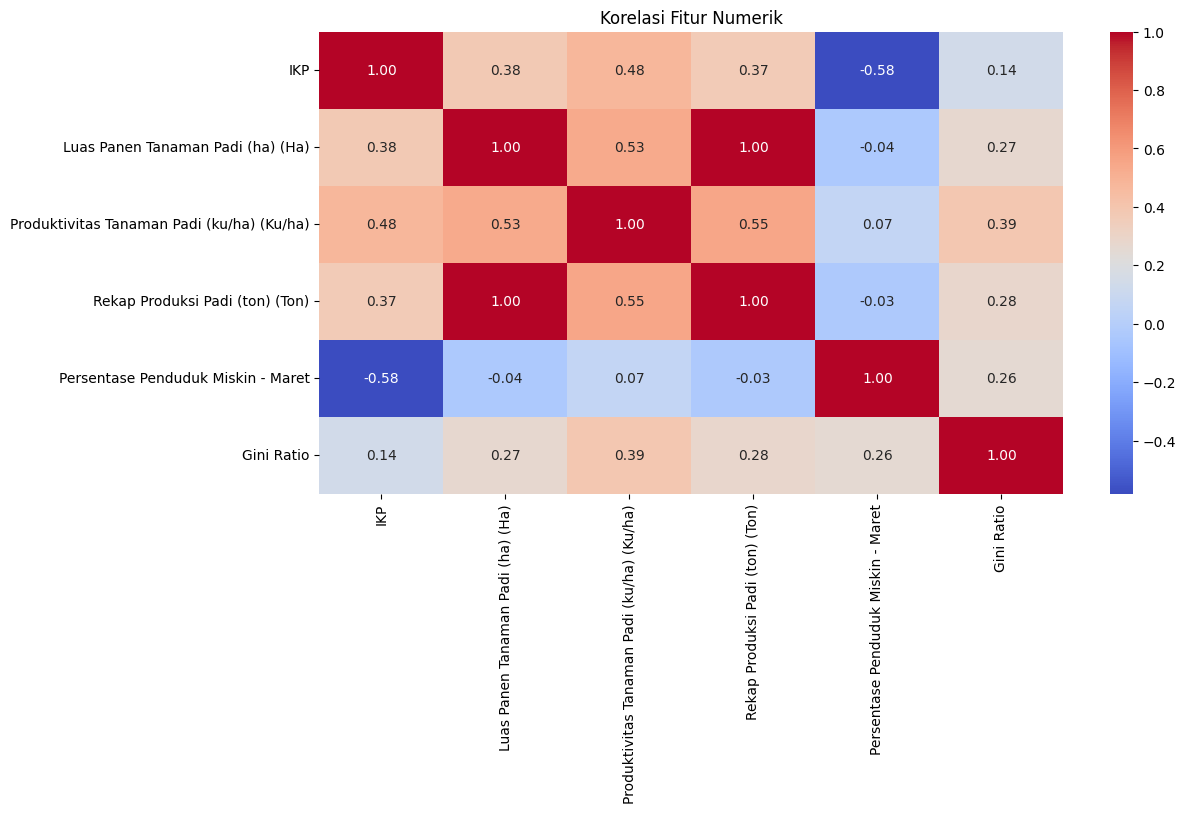

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='TAHUN', y='IKP', hue='PROVINSI', marker='o')
plt.title("Tren IKP per Provinsi (2020-2024)")
plt.ylabel("IKP")
plt.xlabel("Tahun")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='TAHUN', y='Luas Panen Tanaman Padi (ha) (Ha)', hue='PROVINSI', marker='o')
plt.title("Tren Luas Panen Padi per Provinsi")
plt.ylabel("Luas Panen (Ha)")
plt.xlabel("Tahun")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Fitur Numerik")
plt.show()


In [10]:
df_fe = df.copy()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_fe['PROVINSI_ENC'] = le.fit_transform(df_fe['PROVINSI'])
df_fe['Produksi_per_Ha'] = df_fe['Rekap Produksi Padi (ton) (Ton)'] / df_fe['Luas Panen Tanaman Padi (ha) (Ha)']

df_fe = df_fe.sort_values(['PROVINSI','TAHUN'])
df_fe['IKP_lag1'] = df_fe.groupby('PROVINSI')['IKP'].shift(1)

df_fe = df_fe.fillna(method='bfill')

features = ['Luas Panen Tanaman Padi (ha) (Ha)',
            'Produktivitas Tanaman Padi (ku/ha) (Ku/ha)',
            'Rekap Produksi Padi (ton) (Ton)',
            'Persentase Penduduk Miskin - Maret',
            'Gini Ratio',
            'PROVINSI_ENC',
            'Produksi_per_Ha',
            'IKP_lag1']

X = df_fe[features]
y = df_fe['IKP']


/tmp/ipython-input-3098678487.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fe = df_fe.fillna(method='bfill')


In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


RMSE Test Set: 2.8590315523058782
MAE Test Set: 1.6469398992201845
R² Test Set: 0.8856937738843709
CV RMSE: 4.3668097275547755


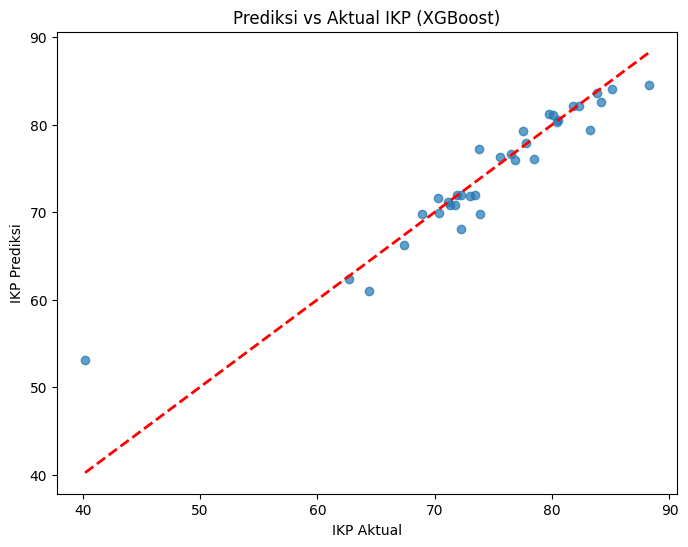

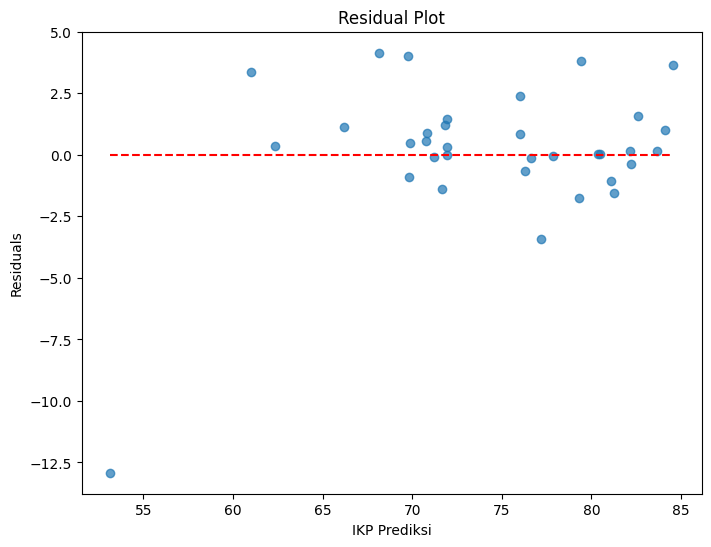

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE Test Set:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE Test Set:", mae)

r2 = r2_score(y_test, y_pred)
print("R² Test Set:", r2)

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("CV RMSE:", -cv_scores.mean())

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("IKP Aktual")
plt.ylabel("IKP Prediksi")
plt.title("Prediksi vs Aktual IKP (XGBoost)")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel("IKP Prediksi")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


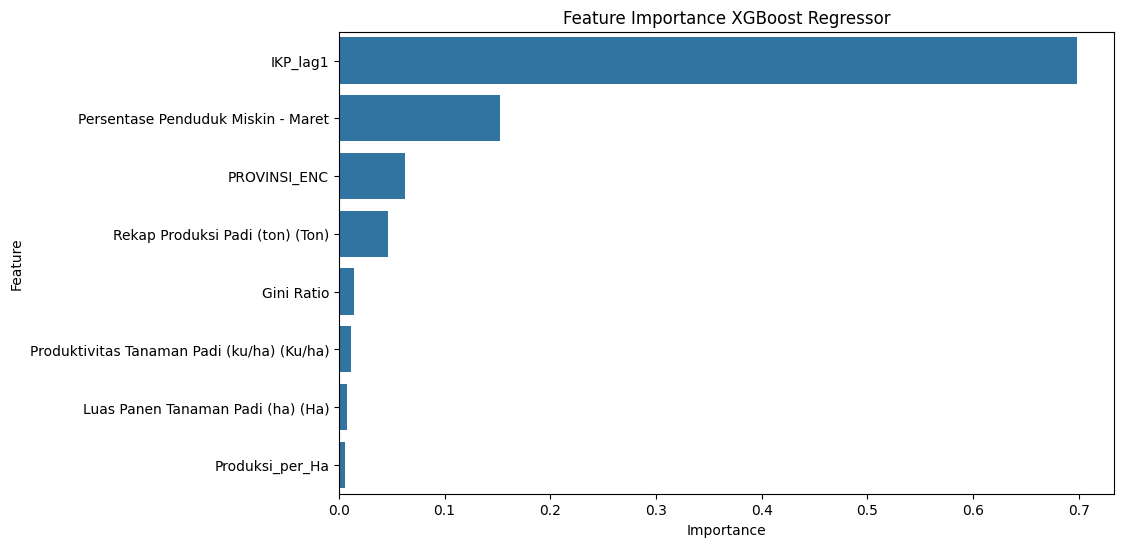

                                      Feature  Importance
7                                    IKP_lag1    0.698391
3          Persentase Penduduk Miskin - Maret    0.152711
5                                PROVINSI_ENC    0.062347
2             Rekap Produksi Padi (ton) (Ton)    0.046392
4                                  Gini Ratio    0.014520
1  Produktivitas Tanaman Padi (ku/ha) (Ku/ha)    0.011560
0           Luas Panen Tanaman Padi (ha) (Ha)    0.007994
6                             Produksi_per_Ha    0.006085


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

xgb_model.fit(X_train, y_train)

importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance XGBoost Regressor")
plt.show()

print(feature_importance_df)


In [17]:
provinsi_list = df_fe['PROVINSI'].unique()
future_years = [2025, 2026]
predictions = []

for prov in provinsi_list:
    last_row = df_fe[df_fe['PROVINSI']==prov].sort_values('TAHUN').iloc[-1]
    ikp_prev = last_row['IKP']
    luas_panen = last_row['Luas Panen Tanaman Padi (ha) (Ha)']
    produktivitas = last_row['Produktivitas Tanaman Padi (ku/ha) (Ku/ha)']
    produksi = last_row['Rekap Produksi Padi (ton) (Ton)']
    miskin = last_row['Persentase Penduduk Miskin - Maret']
    gini = last_row['Gini Ratio']
    prov_enc = last_row['PROVINSI_ENC']
    prod_per_ha = last_row['Produksi_per_Ha']

    for tahun in future_years:
        x_pred = pd.DataFrame({
            'Luas Panen Tanaman Padi (ha) (Ha)':[luas_panen],
            'Produktivitas Tanaman Padi (ku/ha) (Ku/ha)':[produktivitas],
            'Rekap Produksi Padi (ton) (Ton)':[produksi],
            'Persentase Penduduk Miskin - Maret':[miskin],
            'Gini Ratio':[gini],
            'PROVINSI_ENC':[prov_enc],
            'Produksi_per_Ha':[prod_per_ha],
            'IKP_lag1':[ikp_prev]
        })
        ikp_pred = xgb_model.predict(x_pred)[0]
        predictions.append({
            'PROVINSI': prov,
            'TAHUN': tahun,
            'IKP_Prediksi': ikp_pred
        })
        ikp_prev = ikp_pred

pred_df = pd.DataFrame(predictions).sort_values(['PROVINSI','TAHUN'])
print(pred_df)


            PROVINSI  TAHUN  IKP_Prediksi
0               ACEH   2025     74.771843
1               ACEH   2026     76.621223
2               BALI   2025     84.575653
3               BALI   2026     84.521851
4             BANTEN   2025     79.250504
..               ...    ...           ...
63    SUMATERA BARAT   2026     84.319618
64  SUMATERA SELATAN   2025     74.068878
65  SUMATERA SELATAN   2026     74.068878
66    SUMATERA UTARA   2025     78.899147
67    SUMATERA UTARA   2026     79.857040

[68 rows x 3 columns]


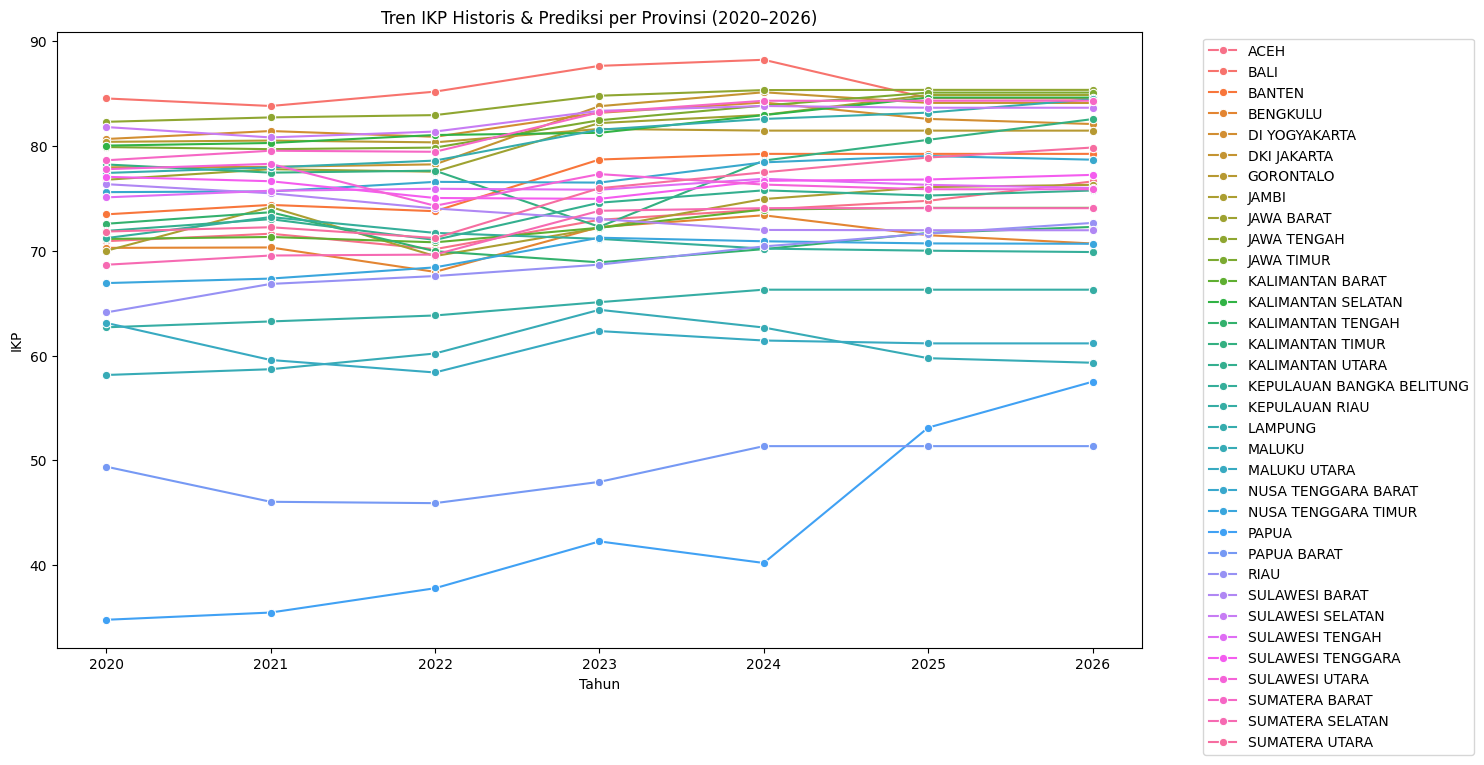

In [18]:
historical = df_fe[['PROVINSI','TAHUN','IKP']].rename(columns={'IKP':'IKP_Prediksi'})
pred_df['TAHUN'] = [2025,2026]*len(provinsi_list)

full_df = pd.concat([historical, pred_df], ignore_index=True)
full_df = full_df.sort_values(['PROVINSI','TAHUN'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.lineplot(data=full_df, x='TAHUN', y='IKP_Prediksi', hue='PROVINSI', marker='o')
plt.title("Tren IKP Historis & Prediksi per Provinsi (2020–2026)")
plt.xlabel("Tahun")
plt.ylabel("IKP")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


/tmp/ipython-input-1373905245.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_diff = df_fe.groupby('PROVINSI').apply(lambda x: x.sort_values('TAHUN')['IKP'].iloc[-1] - x.sort_values('TAHUN')['IKP'].iloc[0])


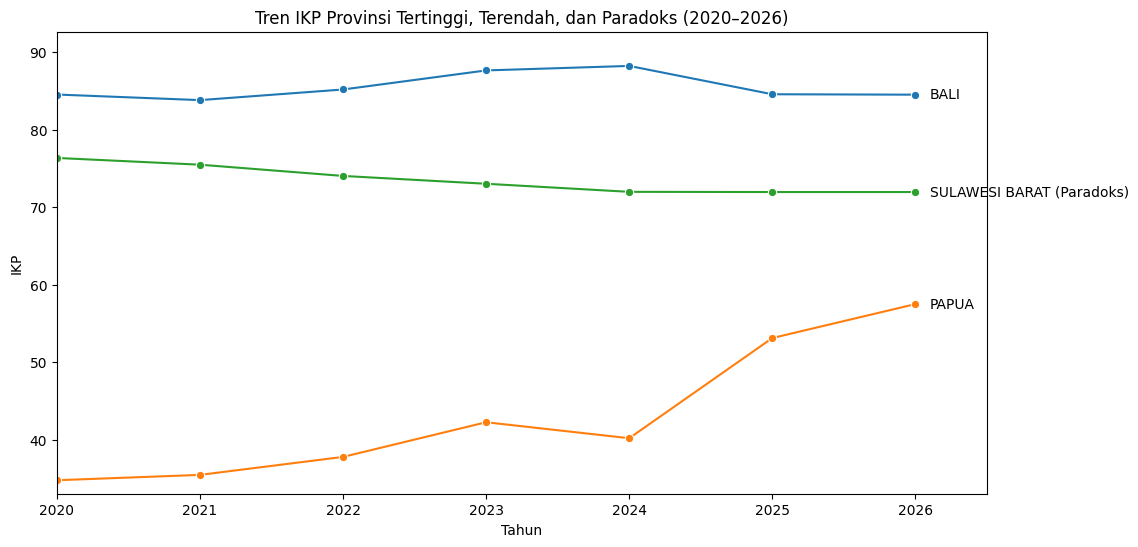

Insight Analisis:
- Provinsi Tertinggi (BALI): IKP rata-rata tinggi karena luas panen dan produktivitas stabil, efisiensi produksi tinggi, ketahanan pangan kuat.
- Provinsi Terendah (PAPUA): IKP rata-rata rendah, meskipun luas panen/produktivitas mungkin moderat, menunjukkan perlu intervensi teknologi atau perbaikan distribusi pangan.
- Provinsi Paradoks (SULAWESI BARAT): IKP menurun walaupun produksi atau produktivitas tinggi → bisa disebabkan faktor sosial-ekonomi, distribusi pangan tidak merata, atau kondisi penduduk miskin meningkat.


In [19]:
prov_mean_ikp = df_fe.groupby('PROVINSI')['IKP'].mean().sort_values(ascending=False)
prov_tertinggi = prov_mean_ikp.index[0]
prov_terendah = prov_mean_ikp.index[-1]
df_diff = df_fe.groupby('PROVINSI').apply(lambda x: x.sort_values('TAHUN')['IKP'].iloc[-1] - x.sort_values('TAHUN')['IKP'].iloc[0])
prov_paradoks = df_diff[df_diff < 0].idxmin()

full_df = pd.concat([
    df_fe[['PROVINSI','TAHUN','IKP']].rename(columns={'IKP':'IKP_Prediksi'}),
    pred_df[['PROVINSI','IKP_Prediksi','TAHUN']]
], ignore_index=True).sort_values(['PROVINSI','TAHUN'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
for prov in [prov_tertinggi, prov_terendah, prov_paradoks]:
    data_plot = full_df[full_df['PROVINSI']==prov]
    sns.lineplot(data=data_plot, x='TAHUN', y='IKP_Prediksi', marker='o', label=prov)
    label_text = prov
    if prov == prov_paradoks:
        label_text += " (Paradoks)"
    plt.text(data_plot['TAHUN'].values[-1]+0.1, data_plot['IKP_Prediksi'].values[-1], label_text, fontsize=10, verticalalignment='center')

plt.title("Tren IKP Provinsi Tertinggi, Terendah, dan Paradoks (2020–2026)")
plt.xlabel("Tahun")
plt.ylabel("IKP")
plt.ylim(full_df['IKP_Prediksi'].min()*0.95, full_df['IKP_Prediksi'].max()*1.05)
plt.xlim(full_df['TAHUN'].min(), full_df['TAHUN'].max()+0.5)
plt.legend().remove()
plt.show()

print("Insight Analisis:")
print(f"- Provinsi Tertinggi ({prov_tertinggi}): IKP rata-rata tinggi karena luas panen dan produktivitas stabil, efisiensi produksi tinggi, ketahanan pangan kuat.")
print(f"- Provinsi Terendah ({prov_terendah}): IKP rata-rata rendah, meskipun luas panen/produktivitas mungkin moderat, menunjukkan perlu intervensi teknologi atau perbaikan distribusi pangan.")
print(f"- Provinsi Paradoks ({prov_paradoks}): IKP menurun walaupun produksi atau produktivitas tinggi → bisa disebabkan faktor sosial-ekonomi, distribusi pangan tidak merata, atau kondisi penduduk miskin meningkat.")


In [20]:
avg_ikp = df.groupby('PROVINSI')['IKP'].mean().reset_index()
avg_ikp.rename(columns={'IKP': 'Rata_rata_IKP_2020_2024'}, inplace=True)

pred_2025 = pred_df[pred_df['TAHUN'] == 2025][['PROVINSI', 'IKP_Prediksi']].rename(columns={'IKP_Prediksi': 'Proyeksi_2025'})
pred_2026 = pred_df[pred_df['TAHUN'] == 2026][['PROVINSI', 'IKP_Prediksi']].rename(columns={'IKP_Prediksi': 'Proyeksi_2026'})

output = avg_ikp.merge(pred_2025, on='PROVINSI').merge(pred_2026, on='PROVINSI')
output.to_csv('Proyeksi_IKP_Provinsi_2020_2026.csv', index=False)
print(output.head())

        PROVINSI  Rata_rata_IKP_2020_2024  Proyeksi_2025  Proyeksi_2026
0           ACEH                   71.922      74.771843      76.621223
1           BALI                   85.886      84.575653      84.521851
2         BANTEN                   75.920      79.250504      79.250504
3       BENGKULU                   70.850      71.489288      70.697182
4  DI YOGYAKARTA                   82.060      82.585571      82.098190


In [22]:
print(output.tail())

             PROVINSI  Rata_rata_IKP_2020_2024  Proyeksi_2025  Proyeksi_2026
29  SULAWESI TENGGARA                   76.076      76.806587      77.246559
30     SULAWESI UTARA                   76.806      75.872963      75.872963
31     SUMATERA BARAT                   81.036      84.319618      84.319618
32   SUMATERA SELATAN                   71.150      74.068878      74.068878
33     SUMATERA UTARA                   73.754      78.899147      79.857040
